In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize
%matplotlib inline

i) Given our initial distribution:

$f(\epsilon;T)d\epsilon = C\frac{\epsilon^2d\epsilon}{\exp{(\epsilon/kT)}-1}$

we first make a change in variables $\epsilon' = \epsilon/kT$.

This results in the distribution

$f(\epsilon')d\epsilon' = A\frac{\epsilon'^2d\epsilon'}{\exp{(\epsilon')}-1}$

where $A=C/(kT)^2$.

ii) We now need to find where this function is a maximum numerically.

In [3]:
def f(eps):
    return eps**2/(np.exp(eps)-1)
def fm(eps):
    return -f(eps)

In [4]:
x0 = 1.0
res = optimize.minimize(fm,x0,method='nelder-mead',options={'xtol':1e-8,'disp':True})
print res
print "f(eps_max) = ",f(res.x)

Optimization terminated successfully.
         Current function value: -0.647610
         Iterations: 29
         Function evaluations: 59
  status: 0
    nfev: 59
 success: True
     fun: -0.64761023789191496
       x: array([ 1.59362426])
 message: 'Optimization terminated successfully.'
     nit: 29
f(eps_max) =  [ 0.64761024]


The function is maximized at $\epsilon'\approx1.594$.

iii) We will now renomralize our function by dividing by $f(\epsilon=1.594) \approx 0.6476$.

$f'(\epsilon')d\epsilon' = B\frac{\epsilon'^2d\epsilon'}{\exp{(\epsilon')}-1}$

where $B = A/0.6476$.

In [5]:
def fp(eps):
    return f(eps)/f(res.x)

iv) Here is a function that returns a photon of energy between $\epsilon_1'=0.1$ and $\epsilon_2'=5.0$.

In [6]:
def en():
    lo,hi = 0.1,5.0
    return np.random.rand()*(hi-lo)+lo

v) Now, we make repeated draws to en(), $e$, as well as many draws from the RNG, $r$. When $r_i>f(e_i)$ then the photon is rejected. Otherwise it is accepted. We do this for $N=100000$ photons.

In [13]:
N = 1000000
N_accepted = 0
N_rejected = 0

acc,facc = [],[]

for i in range(N):
    e = en()   #energy
    fe = fp(e) #f(energy)
    r = np.random.rand() #RNG call between 0 and 1
    if r>fe:
        N_rejected+=1
    else:
        N_accepted+=1
        acc.append(e)
        facc.append(fe)
    continue

print N_accepted, N_rejected, N

677833 322167 1000000


(array([ 0.06319713,  0.10060657,  0.13702245,  0.16354778,  0.19302371,
         0.21018539,  0.23403109,  0.24905508,  0.26222742,  0.27547503,
         0.2843419 ,  0.29384104,  0.29518086,  0.29503031,  0.29993795,
         0.30141325,  0.30309931,  0.29665616,  0.29353996,  0.28964095,
         0.28590753,  0.28226444,  0.27521911,  0.26627698,  0.26159515,
         0.25188525,  0.24276247,  0.23723761,  0.22886753,  0.21820923,
         0.21093809,  0.20298953,  0.19501085,  0.18671604,  0.1803331 ,
         0.1707888 ,  0.16285529,  0.15522286,  0.14804205,  0.1392354 ,
         0.13375571,  0.1274932 ,  0.11909301,  0.11435097,  0.10738092,
         0.10283458,  0.09563872,  0.09146873,  0.08671163,  0.08202981]),
 array([ 0.10003576,  0.19803493,  0.2960341 ,  0.39403327,  0.49203244,
         0.59003161,  0.68803078,  0.78602996,  0.88402913,  0.9820283 ,
         1.08002747,  1.17802664,  1.27602581,  1.37402498,  1.47202415,
         1.57002332,  1.6680225 ,  1.76602167,  1

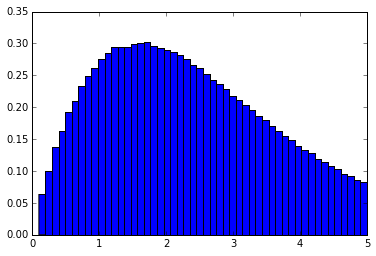

In [14]:
plt.hist(acc,bins=50,normed=True)

iv) This technique is now generalized to probe the distribution at a given energy. This is contained in the following function.

In [9]:
def D_f(eps):
    N = 10000
    N_accepted = 0.0
    fe = fp(eps)
    for i in range(N):
        r = np.random.rand()
        if r<fe:
            N_accepted+=1.0
    return N_accepted/N

Loop over all energies in small steps $d\epsilon'$ and plot the distribution.

<Container object of 100 artists>

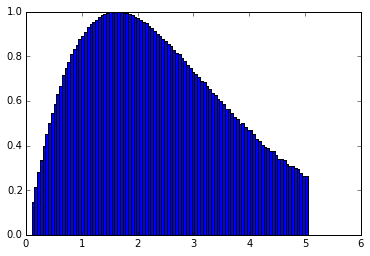

In [10]:
energies = np.linspace(0.1,5.0,100)
Dist = []
for e in energies:
    Dist.append(D_f(e))
plt.bar(energies,Dist,width = energies[1]-energies[0])

Hey hey badabing.